In [1]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
csv_file = 'WL_M9.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file)

# Step 2: Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Step 3: Group the data by 'site' and get the minimum date for each site
site_min_dates = df.groupby('site')['date'].min()

# Step 4: Get the sites that start in 1993
valid_sites = site_min_dates[site_min_dates.dt.year == 1993].index

# Step 5: Filter the DataFrame to include only the valid sites
filtered_df = df[df['site'].isin(valid_sites)]

# Step 6: Save the filtered DataFrame to a new CSV file
filtered_csv_file = 'filtered_data.csv'  # Replace with the desired output file path
filtered_df.to_csv(filtered_csv_file, index=False)

print(f"Filtered data has been saved to '{filtered_csv_file}'.")


Filtered data has been saved to 'filtered_data.csv'.


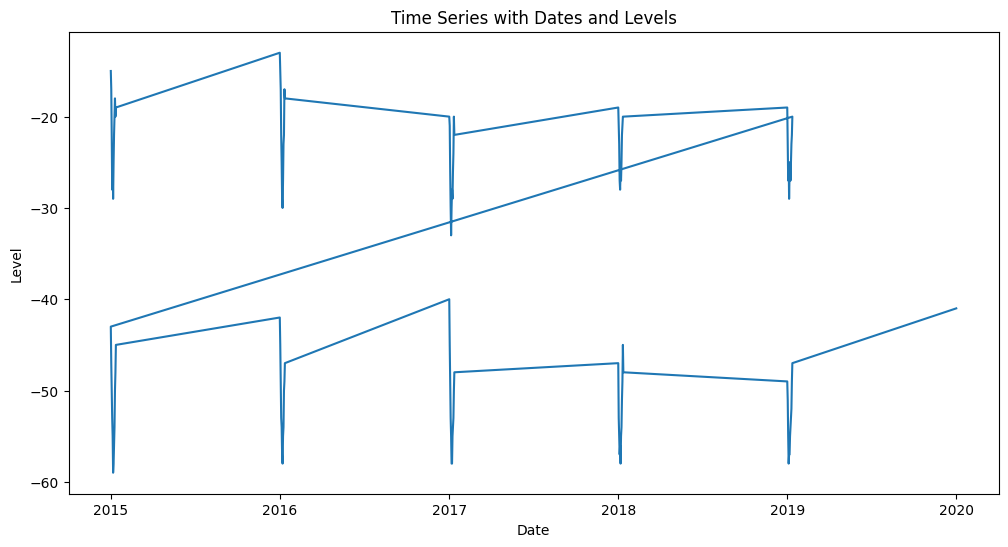

The 'site' column has 2 unique values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
csv_file = 'Fake.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file, sep= ';')

# Step 2: Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Step 3: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['level'])
plt.xlabel('Date')
plt.ylabel('Level')
plt.title('Time Series with Dates and Levels')
plt.show()

# Step 4: Print the number of unique values in the 'site' column
unique_sites = df['site'].nunique()
print(f"The 'site' column has {unique_sites} unique values.")


# Multiple line reg

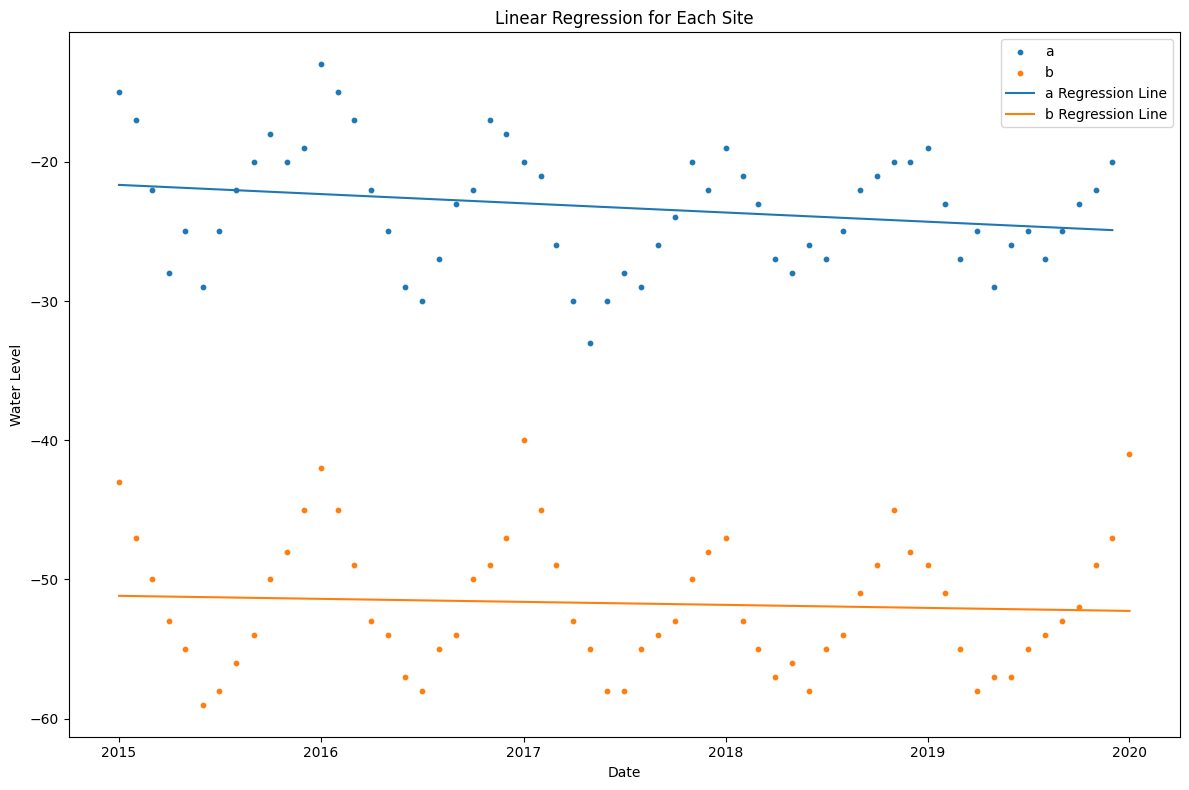

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Fake_D.csv')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Corrected date format

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Plot all regression lines on one graph
plt.figure(figsize=(12, 8))

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for each site
for i, model in enumerate(regression_models):
    site_data = df[df['site'] == sites[i]]
    plt.plot(site_data['date'], model.fittedvalues, label=f'{sites[i]} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
plt.legend()
plt.tight_layout()
plt.show()